In [1]:
import pandas, numpy

import scipy, scipy.stats

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20})

# 0. user-defined variables

In [2]:
data_file ='/home/adrian/projects/HUVECs/data/csv/HUVEC_AllMeasurements_Summary_21.12.2020.Intracellular.csv'

# 1. read data

In [3]:
df = pandas.read_csv(data_file)
df.astype('float', errors='ignore')
df.head()

,Sample ID,Experiment,Treatment,Timepoint (h),Cell numbers,Palmitate,Stearic acid,UDP_Glucose,ATP,UDP_glucuronate,AMP,cAMP,UDP_N_acetylglucosamine,Glutamate,Malate,Succinate,Glutamine,Citrate,Glutathion Ox,Glutathione Red
0,1,2,0.0,0,480000,0.498134,0.355130,0.555664,1.173089,1.471127,0.378996,1.439743,0.948270,0.672770,0.935037,1.085146,0.950878,1.019898,1.358301,0.340923
1,2,2,0.0,0,480000,0.649966,0.504734,5.899347,1.642630,3.903292,0.289142,1.956214,0.514516,0.563908,1.423291,1.002194,0.685802,0.790827,0.804011,0.259466
2,3,2,0.0,0,480000,1.037842,0.811131,4.862396,4.494113,2.117562,0.172695,0.184441,0.314264,0.389639,0.940041,0.833751,0.527135,0.510089,0.913530,0.162939
3,4,2,0.0,4,560000,0.899369,1.097788,0.507172,0.605210,0.965708,1.235501,1.984364,2.796323,2.053525,2.922242,1.885886,1.702201,1.803593,1.404071,2.868344
4,5,2,0.0,4,560000,0.924384,0.881210,0.677431,0.683501,0.771615,0.747560,1.616192,1.380128,1.282800,2.280236,1.018277,1.199941,1.047429,0.818987,1.483302


# 2. format data

## 2.1. select appropriate rows

In [4]:
df = df[df['Cell numbers'].str.isnumeric()]
df['Cell numbers'] = df['Cell numbers'].astype(float)

In [5]:
pandas.set_option("display.max_rows", 200, "display.max_columns", 20)
print(df)

     Sample ID   Experiment  Treatment  Timepoint (h)  Cell numbers  \
0             1           2        0.0              0      480000.0   
1             2           2        0.0              0      480000.0   
2             3           2        0.0              0      480000.0   
3             4           2        0.0              4      560000.0   
4             5           2        0.0              4      560000.0   
5             6           2        0.0              4      560000.0   
6             7           2        0.5              4      510000.0   
7             8           2        0.5              4      510000.0   
8             9           2        0.5              4      510000.0   
9            10           2        5.0              4      380000.0   
10           11           2        5.0              4      380000.0   
11           12           2        5.0              4      380000.0   
12           13           2       50.0              4      205000.0   
13    

# 3. plot

## 3.1. normalized by cell numbers

In [6]:
metabolites = df.columns[5:]
experiments = [2, 3, 5, 6, 7]
times = [4, 24]
treatments = [0.5, 5, 50]

In [7]:
import seaborn

mess nan
mess nan
mess nan
mess nan
mess nan
[[0.6138697929026544, 0.04793149380814102, -1.1130486295388706, 0.49508169998635077, -2.904505692029503], [0, -0.5173280011418057, 0.23042406592235107, 2.1844391951253384, -2.5501510326841337], [1.7686603056194181, -0.9816530343976307, -0.020282074331848445, 2.397763049661101, -3.0235074400191717], [0, 0.3000398321433143, -1.528318536981488, -1.6527369651671961, 1.1680201178450482], [0, 0.42513013894323165, -1.8682788219014246, -2.460526042253857, 0.010602653636534556], [0, -0.48092816680010897, -0.6461735131598434, 0, -4.898285893145707]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


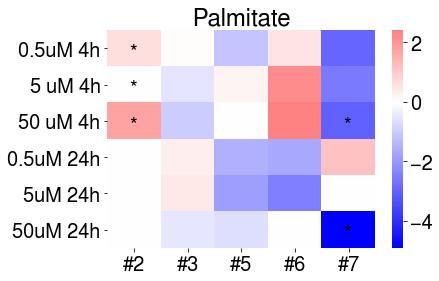

mess nan
mess nan
mess nan
mess nan
mess nan
[[0.7545133170122231, 0.34729757719658433, -1.0938941276309233, 1.9055275146586546, -2.714331142328242], [0, -0.29236073114757605, -0.17446199969712908, 2.2326726143810327, -3.286939718333558], [1.8986271469266516, -0.5584794290272604, -0.18684502017663684, 1.39524614118048, -1.975752241222106], [0, -0.17823159693273655, -1.3668357375192286, -2.0919181078235822, 2.282073034056754], [0, 0.07690403626093427, -1.8443032499182674, -1.939567745617992, 1.008692906967834], [0, -0.5701797175050353, -0.5263638910482599, 0, -2.78395837103419]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


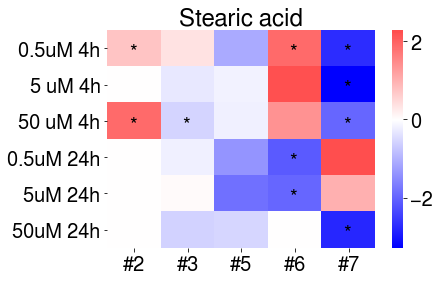

mess nan
[[0.8021739448164588, -0.5178515120320082, 0.8088468033586672, 0.4144249694660213, -0.8825985060044298], [0.7691527951725216, -1.4533607998489788, 0.5828910451002944, -0.13060692289602074, -0.11074728574184942], [-0.34010979596063895, -1.3431400272011473, -1.770914978385191, 0.16108599222886172, -0.5047232212456143], [-0.11177868688556046, -5.808766361795484, -0.8858652944390437, -0.6448002241719945, 1.2334453927496343], [0.2341234561167835, -5.529980880204383, 0.5795732984085802, -0.32342966819126673, -0.33496266299234956], [-0.6568725686111638, -6.326724842841953, -2.586215637401313, 0, -1.56705292202475]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


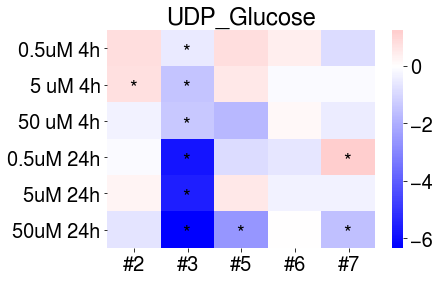

mess nan
[[0.0011210745887338049, -1.2879911089782217, 9.319743161799446, 1.0942051196307705, -1.0779139018385888], [0.4178961932177441, -2.3785331021554605, 4.217223099329738, -0.2882943907968955, 0.287061855834516], [-1.8547816718813244, -2.750279910958074, 0.1057048408395926, 0.09215814263403832, -0.5762064035972908], [0.3172573193861629, -7.535028310445616, -0.4662495274871654, 0.13182064990990908, 1.3926521491323767], [0.08559164958918207, -5.1492978420514, 0.18945906796927298, 0.3377785690620992, 0.037333942808348126], [2.7267592127751903, -8.216151355253523, -1.894577957843528, 0, -1.564065017067625]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


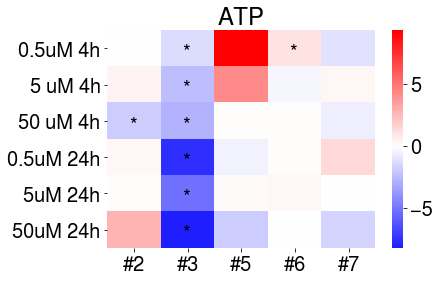

mess nan
[[0.07703750655720747, 1.8893343680331807, 2.1117975041571317, -0.15879587693300062, -3.405858530460033], [0.6599375404405927, 0.7799538220408656, 2.3001254197937375, -0.3335313868426541, -0.4003978981701062], [-1.2232007381368868, -0.3786062340044132, 0.38600817473596266, 0.13961877409630108, -0.45500210093656096], [-0.2944553494363556, -6.29648148019218, -2.342132038338783, -0.42044993249065366, 2.1658810090074003], [-0.33370338678304473, -6.67271200391745, 0.6463728970038355, 0.473493734010908, 1.3700135260618873], [-0.8578449364724389, -7.4176232941734295, -3.4253286113823016, 0, -0.40988434454847283]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


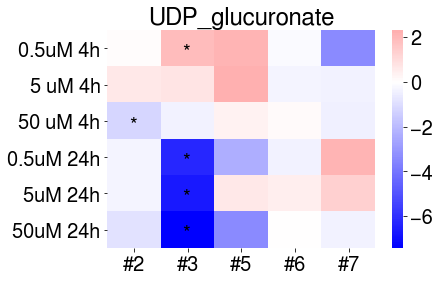

mess nan
[[-0.34062431128307846, 0.6647738079339511, -1.2800078652732905, 0.29257293477234203, -0.7897868154863136], [0.2919609557255684, 0.13377091495703314, -0.12731944302876363, 0.4612235936992478, 0.15383447871010253], [0.3380780778463613, -0.8436872235313329, -0.5690855010796364, 0.9402358147159657, -0.15248735515423215], [0.11634622008959841, -3.2809884647700693, -0.3908269984581363, -0.21647590198926725, 0.9891220044323796], [0.32415539765592866, -2.17265232582891, -0.5798833545282799, -1.60951019542517, 1.2308402622536534], [1.8851777344501808, -2.242474690185137, -1.4015629128944622, 0, -0.9219793400923274]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


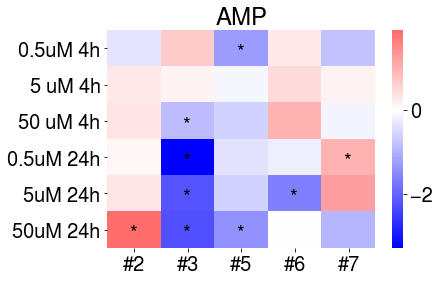

mess nan
[[0.23415561937362298, -0.34901650717405214, -0.904787190291233, 0.8886143617878786, -0.10524522197249866], [0.3279704333892696, 0.5686969291468319, 0.20677863593927945, 0.660964207167436, 0.7098666198449818], [-2.2334278365118623, -1.4805457550805026, 0.7701128820110894, 0.3416067815157356, 0.32363709404127183], [0.26936372210941734, -5.685502441063279, -0.22159056993586343, -0.6579293858611096, 1.6771599430139625], [1.2674722460147692, -2.5614751495698123, -1.6520581492464697, -0.668605373299959, 0.9661398649153573], [1.6772687775485404, -3.9452617148642153, -0.5088120174799813, 0, -0.7169984020497875]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


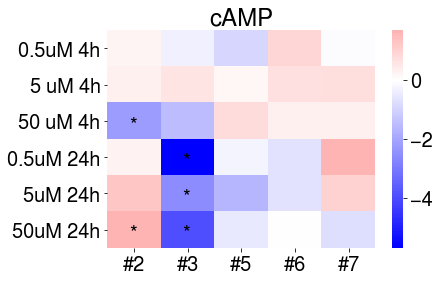

mess nan
[[-1.3407056091635228, -1.1808508132614792, -0.6105007873110856, 1.332039478795344, 0.5636892202577466], [-0.7565687275172193, -1.7301012071695852, 0.3956968255175029, 0.7316634138255629, -0.21346281630672378], [-1.4691499000626433, -2.325228318459109, 0.380858197296028, 1.384571502863438, -0.1545332737352174], [1.2271449426402818, -5.95508986207648, -0.3669357688015585, -0.9537787253956793, 1.8819571668320287], [1.3584630014947927, -5.216901334005665, -1.6036469855573021, -0.7447720648996846, 0.7599123328403927], [2.2870405179458677, -4.979725232639325, -1.9615852848630237, 0, -1.0176686641586075]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


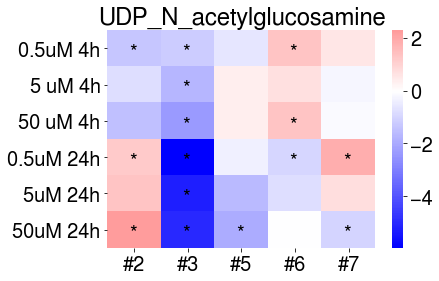

mess nan
[[-0.41729764042524614, -0.3658701598777239, -0.5403755729307347, 0.9658791850573502, -0.2924397195622646], [-0.4721528603642519, -0.36687306809165526, -0.22656816201607377, 0.1921241005305989, 0.06837575997629192], [-0.8162619350792831, -1.1301586001402906, 0.49279952614685624, 0.19347041182946864, -0.147886598705549], [1.511100213705212, -4.567016066258786, -0.0017487194054187423, -1.3751375947918956, 1.1544061980310438], [1.9672241295238069, -3.339597887453642, -1.259588413164863, -1.1866097915137048, -0.03069712124977379], [1.80472550987813, -4.219624171065071, -1.0917422060950488, 0, -1.3493540781434419]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


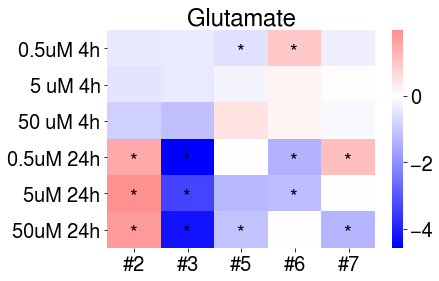

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log2
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log2
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


mess -inf
mess -inf
mess inf
mess inf
mess nan
[[-0.4177821582281542, -1.396163521432011, 0.17059582336743567, -0.5837197705309402, -0.05606387822189885], [-0.5181695684346277, -2.402994224844324, 1.504091463120074, 0, -0.6684707360232122], [-1.892031141915544, -2.6519008263502144, 0.7975540013181808, 0, -0.08711870337063972], [1.4139495464405194, 0.3848357196843896, 0.2804868470088811, 0, 2.893009092817425], [1.7966104469707784, 2.4506097421026767, -2.949639954537147, 0, 1.7598347028632482], [1.626134638474918, 0.736489542775927, -0.9641607028061274, 0, -0.8719072790960907]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars
/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


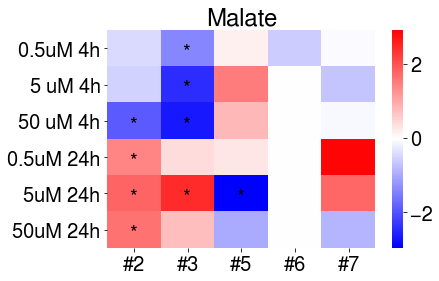

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log2
/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


mess -inf
mess nan
[[-0.6383865823656588, -0.8078494273454283, 0.7043972274171156, 1.240991161592766, -0.09528516564622545], [-0.32941466571523215, -0.7753887283978385, 0.6268409143619296, 0.15716636409300497, -0.29721808098584906], [0.8621028541495318, -1.221954881373086, 1.1728821180381186, 0.4232114307245456, -0.226073262030185], [0.74286015605357, -2.929780140904756, -0.13675332376376886, -0.2785835900101932, 1.1219608966744794], [1.597644211030748, -1.061702632391396, -0.4196201258552498, -0.2795531431655617, 0.3353804050205577], [2.5430360473693985, 0, 0.634280284499161, 0, -2.0120076063435826]] 6


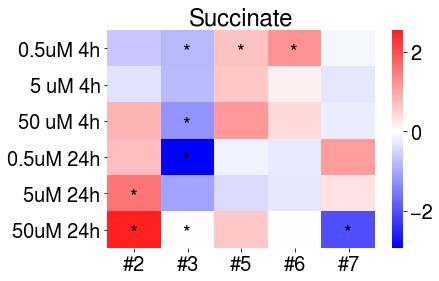

mess nan
[[-0.633412960145562, -0.24775768736977039, -0.27444477516010496, 0.14965395868071002, 0.06084579242565914], [-0.27361767416079474, -0.18728172850398664, 0.3704531499640939, -0.4167214593240552, 0.06716016017859174], [0.7759750660724061, -0.8121410595097951, 0.3772502408757125, -0.14629370741310996, 0.13795804401313233], [0.9137383490451809, -2.2730248351795734, -0.31744174095900796, -1.107423892483263, 1.6582362693036141], [1.0096703436091417, -1.1809514791414453, -1.3881728587518762, -1.0147506771418784, 0.44691273012360905], [1.5622880135915636, -0.6123867559056579, -0.5845937106294569, 0, -0.8151937366444507]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


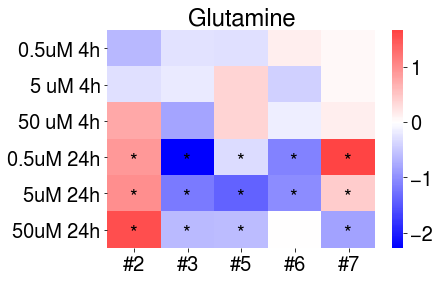

mess nan
[[-0.662028823890441, -0.25294742114946084, -0.41733736730011683, 0.7514747945834632, -0.47423218298453174], [-0.5247665593187804, -0.5624535509590545, 0.21220231613453555, 0.17700752186491595, 0.07909450832429907], [0.037195514018562324, -1.225562346947368, 0.5087652790324008, 0.6691736447964621, -0.048887573644495544], [0.48119556296021776, -3.8393733537168204, -0.031376978873825206, -1.3235251663537582, 1.3499144140999266], [0.941103817798321, -3.120996644484709, -1.0705458391809046, -1.1567949659261143, 0.18791271222603137], [1.761353780485373, -3.378968566863645, -0.7791521550757656, 0, -1.307113117563518]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


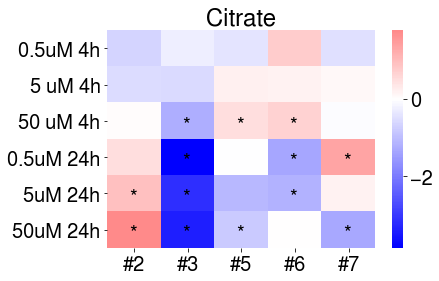

mess nan
[[-0.5936765471541497, 0.3512431033574439, 0.2050768063321191, 0.2813684255237656, -0.2859194871576043], [0.16104951566692566, 0.046257498934265916, 0.3107836050942405, 0.2432450801353167, 0.20745015670725575], [0.2836803105655674, 0.021814210975197586, 3.166240213499491, 0.06509810739414895, -0.6523560266278408], [0.8486474432759793, -4.203906674015452, 0.27446661183457666, -1.0170239999221309, 1.7727628411505874], [0.7894321497329381, -3.1950026943068948, -1.7272794478147353, -0.6858748118985842, 0.9494813613811761], [2.30244609089345, -5.19348525816741, -0.4977126938644065, 0, -0.39985853002250693]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


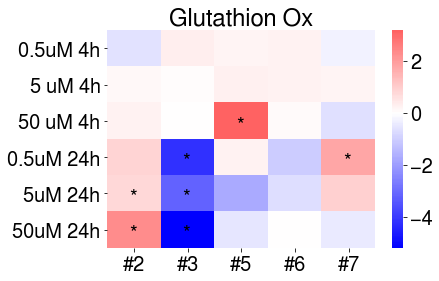

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log2
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log2


mess -inf
mess -inf


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log2
/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/adrian/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


mess -inf
mess nan
[[-0.8694132905569353, -0.6742407199496779, -0.5055712771218422, 0.9385188155637542, -0.41563787105995215], [-1.4851217844240476, -0.6857406313813526, -0.0703617340622759, 0.3283845009378173, -0.13685414607706775], [0, -1.1488198957579643, 0.3369178601055449, 0.4870073609340267, -0.12488366405268855], [1.8427320430727585, 0, 0.05306554206114951, -1.1632132026500106, 1.2508700066449967], [2.4865109915986947, -7.752939794411016, -0.5518550472501809, -0.9450222224511065, 0.10911763250679815], [2.6175697549246726, 0, -0.8563816960436268, 0, -1.09776347500538]] 6


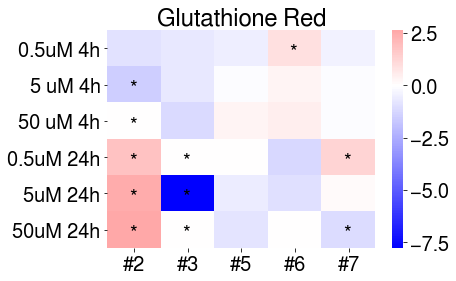

In [26]:
f = open('messages_significances.txt', 'w')

for metabolite in metabolites:
    metabolite_heatmap = []; significance_heatmap = []
    for time in times:
        for treatment in treatments:
            significances = []; trends = []; mhvs = []; shvs = []
            for experiment in experiments:
                
                raw_sample_values = df[(df['Treatment'] == treatment) & (df['Timepoint (h)'] == time) &(df['Experiment'] == experiment)][metabolite].values
                raw_reference_values = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == time) &(df['Experiment'] == experiment)][metabolite].values
                
                cn_sample = df[(df['Treatment'] == treatment) & (df['Timepoint (h)'] == time) &(df['Experiment'] == experiment)]['Cell numbers'].values
                cn_reference = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == time) &(df['Experiment'] == experiment)]['Cell numbers'].values
                
                cnf_sample = 1e6/cn_sample
                cnf_reference = 1e6/cn_reference
                
                sample_cn_norm_values = raw_sample_values * cnf_sample
                reference_cn_norm_values = raw_reference_values * cnf_reference
                
                fc = numpy.mean(sample_cn_norm_values) / numpy.mean(reference_cn_norm_values)
                log2fc = numpy.log2(fc)
                if numpy.isfinite(log2fc) == False:
                    print('mess', log2fc)
                    log2fc = 0
                mhvs.append(log2fc)
                
                if len(sample_cn_norm_values) > 1:
                    if len(reference_cn_norm_values) > 1:
                        stat, pvalue = scipy.stats.mannwhitneyu(sample_cn_norm_values, reference_cn_norm_values)
                else:
                    stat = 'bypassed'; pvalue = 1
                
                if pvalue < 0.05:
                    shvs.append(True)
                    significances.append(True)
                    matplotlib.pyplot.plot([1, 2], [reference_cn_norm_values, sample_cn_norm_values], 'ok', alpha=0.5)
                    matplotlib.pyplot.xticks([1, 2], ['reference', 'sample'])
                    
                    filename = 'figures/{}_treatment_{}_time_{}.pdf'.format(metabolite, treatment, time)
                    matplotlib.pyplot.savefig(filename)
                    matplotlib.pyplot.clf()
                    if numpy.mean(sample_cn_norm_values) > numpy.mean(reference_cn_norm_values):
                        trends.append('up')
                    else:
                        trends.append('down')
                else:
                    significances.append(False)
                    trends.append('null')
                    shvs.append(False)
                
                ###
                ### message
                ###
                f.write('{} | treatment {} | time {} | experiment {} | \n'.format(metabolite, treatment, time, experiment))
                f.write('\t raw_sample_values \t {} \n'.format(raw_sample_values))
                f.write('\t raw_reference_values \t {} \n'.format(raw_reference_values))
                f.write('\t cn_sample \t {} \n'.format(cn_sample))
                f.write('\t cn_reference \t {} \n'.format(cn_reference))
                f.write('\t cnf_sample \t {} \n'.format(cnf_sample))
                f.write('\t cnf_reference \t {} \n'.format(cnf_reference))
                f.write('\t sample_cn_norm_values \t {} \n'.format(sample_cn_norm_values))
                f.write('\t reference_cn_norm_values \t {} \n'.format(reference_cn_norm_values))
                f.write('\t U-MW \t {} {} \n'.format(stat, pvalue))
            ###
            ### majority vote
            ###
            if (trends.count('up') >= 3) | (trends.count('down') >= 3):
                decision = True
                f.write('{} treatment {} time {} | Decision | {} | Because of {} \n'.format(metabolite, treatment, time, decision, trends))
                f.write('\n')
            else:
                decision = False
                f.write('{} treatment {} time {} | Decision | {} | Because of {} \n'.format(metabolite, treatment, time, decision, trends))
            f.write('\n')
            
            ###
            metabolite_heatmap.append(mhvs)
            significance_heatmap.append(shvs)
            
    ###
    print(metabolite_heatmap, len(metabolite_heatmap))
    the_yticks = ['0.5uM 4h', '5 uM 4h', '50 uM 4h', '0.5uM 24h', '5uM 24h', '50uM 24h']
    the_xticks = ['#{}'.format(element) for element in experiments]
    seaborn.heatmap(metabolite_heatmap, cmap='bwr', xticklabels=the_xticks, center=0, yticklabels=the_yticks)
    
    for i in range(len(experiments)):
        for j in range(len(the_yticks)):
            if significance_heatmap[j][i] == True:
                matplotlib.pyplot.text(i+0.4, j+0.75, '*')
    
    matplotlib.pyplot.title(metabolite)
    matplotlib.pyplot.show()
            
f.close()